In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,10
from segtools.segtools.scores_dense import seg
import tifffile

In [82]:
def ellipsoid(sx=128, sy=128, loc=(64,64),a=10,coeff=2, ax1=np.array([3,2])):
    q = np.zeros((sx,sy))
    ax1n = ax1/np.sqrt(np.dot(ax1,ax1))

    ax2n = np.array([ax1n[1],-ax1n[0]])
    b=coeff*a

    for i in range(sx):
        for j in range(sy):
            vec = np.array(loc) - np.array([i,j])
            pr1 = np.dot(vec,ax1n)
            pr2 = np.dot(vec,ax2n)

            if (((pr1/a)**2 + (pr2/b)**2) <= 1):
                q[i,j] = 1
                
    return q.astype(np.int32)

In [90]:
def ellipsoid_color(sx=128, sy=128, loc=(64,64), a=10,coeff=2, ax1=np.array([3,2]), color=[255,0,0,255]):
    q = np.zeros((sx,sy,4))
    ax1n = ax1/np.sqrt(np.dot(ax1,ax1))

    ax2n = np.array([ax1n[1], -ax1n[0]])
    b=coeff*a

    for i in range(sx):
        for j in range(sy):
            vec = np.array(loc) - np.array([i,j])
            pr1 = np.dot(vec,ax1n)
            pr2 = np.dot(vec,ax2n)

            if (((pr1/a)**2 + (pr2/b)**2) <= 1):
                q[i,j,:] = np.array(color)
                
    return q.astype(np.uint8)

In [101]:
ell1 = ellipsoid()
ell2 = ellipsoid(loc=(64,70))

ell1_c = ellipsoid_color(color=[255,0,0,200])
ell2_c = ellipsoid_color(color=[0,255,0,200], loc=[64,65])

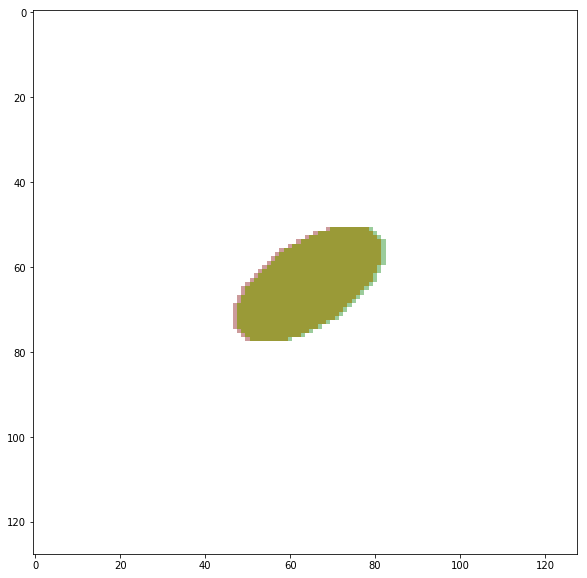

In [102]:
img = (0.5*ell1_c + 0.5*ell2_c).astype(np.uint8)
plt.imshow(img)

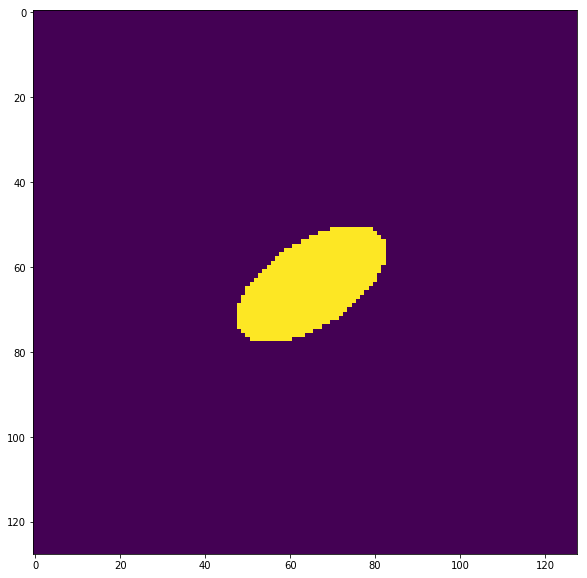

In [104]:
plt.imshow(ell1_c[:,:,1])

In [108]:
score = seg(ell1_c[:,:,0],ell2_c[:,:,1])

/Users/dibrov/Documents/PhD/software/segtools/segtools/scores_dense.py:29: RuntimeWarning: invalid value encountered in true_divide
  return psg / (rsum + csum - psg)
/Users/dibrov/Documents/PhD/software/segtools/segtools/scores_dense.py:41: RuntimeWarning: invalid value encountered in true_divide
  m0 = np.where(tmp==0,0,psg / tmp)
/Users/dibrov/Documents/PhD/software/segtools/segtools/scores_dense.py:43: RuntimeWarning: invalid value encountered in true_divide
  m1 = np.where(tmp==0,0,psg / tmp)


In [109]:
score

0.916923076923077

In [127]:
rang = 50
score = np.zeros(rang)
for dist in range(rang):
    ell1_c = ellipsoid_color(color=[255,0,0,200])
    ell2_c = ellipsoid_color(color=[0,255,0,200], loc=[64,64+dist])
    img = (0.5*ell1_c + 0.5*ell2_c).astype(np.uint8)
#     tifffile.imsave("../../data/seg/img_" + str(dist).zfill(2)+".tif",img)
    score[dist] = seg((ell1_c[:,:,0]/255).astype(np.int32), (ell2_c[:,:,1]/255).astype(np.int32))
    plt.imshow(img)
    plt.text(64,10,str(score[dist]), fontsize=20)
    plt.axis('off')
    plt.savefig("../../data/seg/img_" + str(dist).zfill(2)+".tif")
    plt.clf()

In [113]:
score

array([1.        , 0.91692308, 0.84047267, 0.76988636, 0.70451436,
       0.64379947, 0.58726115, 0.53448276, 0.48510131, 0.43879908,
       0.39529675, 0.35729847, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

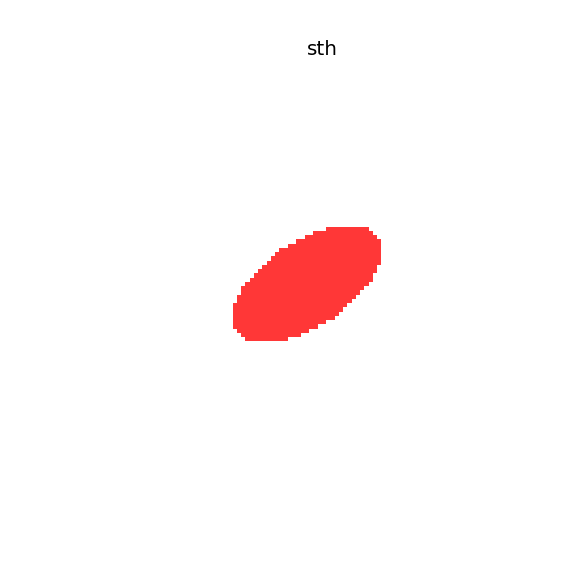

In [124]:
plt.imshow(ell1_c)
plt.text(64,10,"sth", fontsize=20)
plt.axis('off')
plt.savefig("../../data/bla.png")